# Importing the necessary libraries required for our Data analysis task

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
df = pd.read_csv('IRIS.csv')

In [476]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Finding number of rows and columns</h3>

In [477]:
print(f'numbers of rows = {df.shape[0]}')
print(f'numbers of columns = {df.shape[1]}')

numbers of rows = 150
numbers of columns = 5


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [479]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>Handling duplicates in the dataset</h3>

In [480]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)
print(f"Total duplicated rows: {duplicates.shape[0]}")

     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
Total duplicated rows: 5


In [481]:
duplicates = df.duplicated().sum()
print(f'The number of duplicates are {duplicates}')

The number of duplicates are 3


In [482]:
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(147, 5)


<h3>Handling null values in the dataset</h3>

In [483]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Conclusions about the given iris flower dataset

1. No null value in the dataset
2. Total 3 really duplicated values existed in the dataset (2 of one kind and 1 of another kind) 
3. After the removal of duplicates, we now have 147 rows and 5 columns

In [484]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [485]:
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.00,147.00,147.00,147.00,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.86,3.06,3.78,1.21,NaN
std,0.83,0.44,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.40,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


<br>Calculating unique values of each variable</br>

In [486]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


# Data Visualization and Understanding the relationships analysis

<br>Numerical Columns visualization</br>

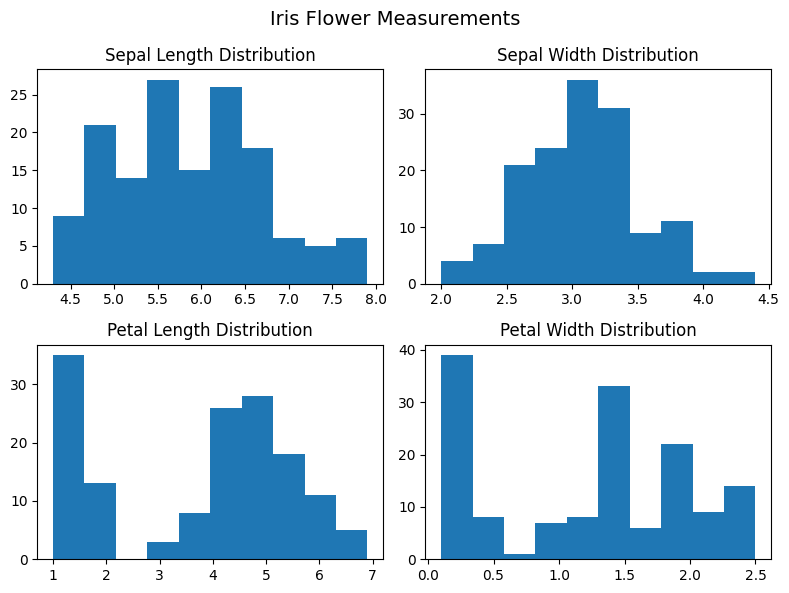

In [487]:
plt.figure(figsize=(8, 6))
plt.suptitle('Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2,1)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3) 
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

plt.tight_layout() 
plt.show()

Sepal length vs Sepal width

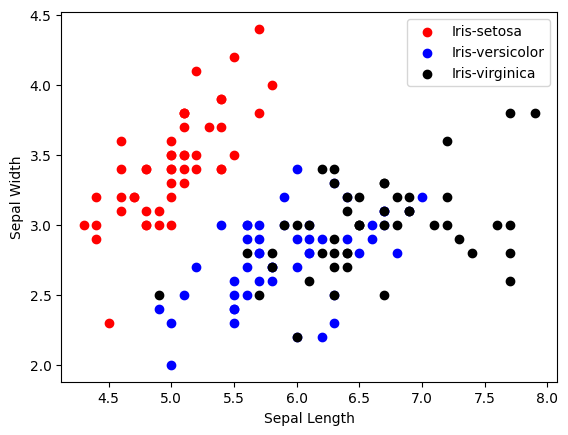

In [488]:
colors = ['red', 'blue', 'black']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()
plt.show()

The scatter plot shows the relationship between Sepal Length and Sepal Width for three Iris species. Iris-setosa (red) is clearly separable with shorter Sepal Length and wider Sepal Width. Iris-versicolor (blue) and Iris-virginica (black) overlap, making them harder to distinguish using these features alone. Overall, the plot highlights that Iris-setosa is easily identifiable, while the other two species require additional features for better classification.

Petal Length vs Petal Width


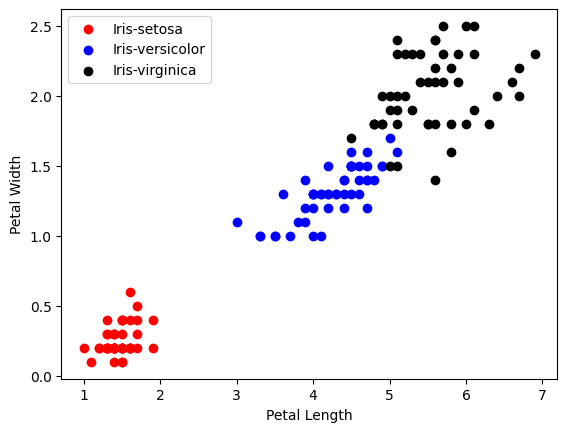

In [489]:
colors = ['red', 'blue', 'black']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()
plt.show()

Above plot shows that Iris-setosa is well-separated, while Iris-versicolor and Iris-virginica overlap, making them harder to distinguish. A linear classifier can separate setosa, but versicolor and virginica may need a more complex boundary.

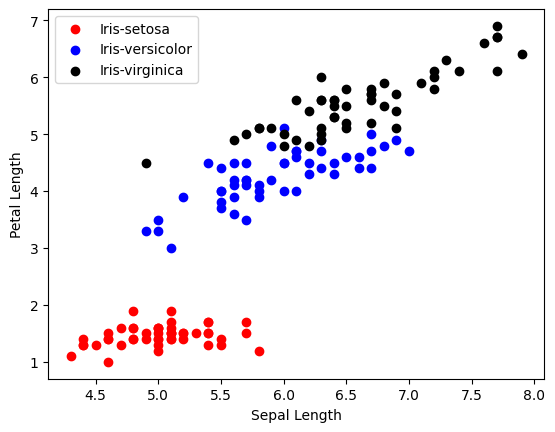

In [490]:
colors = ['red', 'blue', 'black']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()
plt.show()

Iris-setosa is well-separated with consistently lower petal length values along the y-axis.
Iris-versicolor and Iris-virginica show overlapping petal lengths, making classification harder.
Along the x-axis (sepal length), setosa remains in a distinct lower range, while versicolor and virginica overlap.
A simple boundary along the y-axis can separate setosa, but distinguishing versicolor from virginica requires a more complex decision rule.

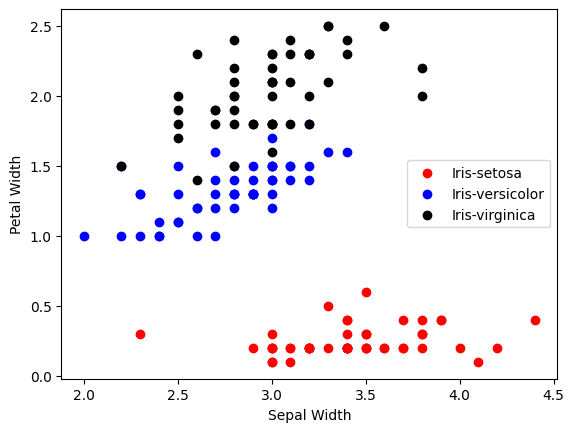

In [491]:
colors = ['red', 'blue', 'black']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()
plt.show()

Above plot shows Iris-setosa is well-separated with consistently lower petal width values along the y-axis. Iris-versicolor and Iris-virginica overlap significantly in petal width, making classification more challenging. Along the x-axis (sepal width), setosa covers a broader range, while versicolor and virginica are more concentrated. A simple decision boundary on the y-axis can separate setosa, but distinguishing versicolor from virginica requires a more complex approach.

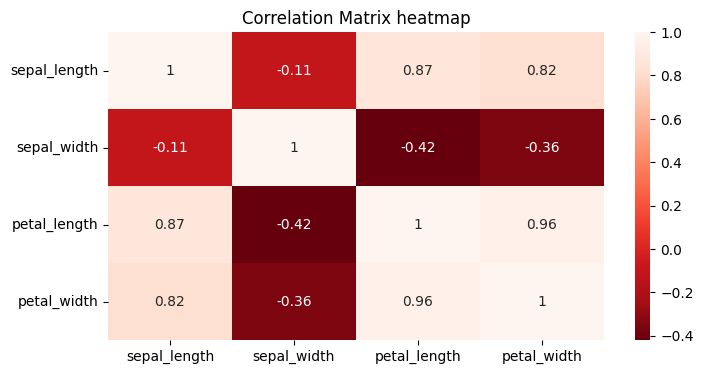

In [492]:
correlation_matrix = df.iloc[:,0:4].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds_r')
plt.title('Correlation Matrix heatmap')
plt.show()

The correlation heatmap shows strong positive correlation between petal length and petal width (0.96) and also between sepal length and petal length (0.87). Sepal width has weak negative correlations with other features. This suggests petal measurements are more closely related and influential for classification, while sepal width is less significant.

# Basic feature engineering and Data Preprocessing

1. Categorical Encoding 

In [493]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# labelling the categorical columns like species 
# Iris-Setosa is 0 , Iris-Versicolor is 1 and Iris Verginica is 2

df['species'] = le.fit_transform(df['species'])

In [494]:
print (df['species'])
print('\n')
print('Encoded strings (species-name) as : ',df['species'].unique())


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32


Encoded strings (species-name) as :  [0 1 2]


Separating features and result

In [495]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [496]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [497]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

Data Splitting


In [498]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [499]:
print(x_train)
print(x_test)

     sepal_length  sepal_width  petal_length  petal_width
137           6.4          3.1           5.5          1.8
47            4.6          3.2           1.4          0.2
121           5.6          2.8           4.9          2.0
27            5.2          3.5           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
73            6.1          2.8           4.7          1.2
108           6.7          2.5           5.8          1.8
14            5.8          4.0           1.2          0.2
94            5.6          2.7           4.2          1.3
104           6.5          3.0           5.8          2.2

[117 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
127           6.1          3.0           4.9          1.8
53            5.5          2.3           4.0          1.3
140           6.7          3.1           5.6          2.4
19            5.1          3.8           1.5    

In [500]:
print(y_train)
print(y_test)

137    2
47     0
121    2
27     0
4      0
      ..
73     1
108    2
14     0
94     1
104    2
Name: species, Length: 117, dtype: int32
127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
Name: species, dtype: int32


# Machine Learning Models and Approaches


In [501]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [502]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
   
   # Model fitting and predictions
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Confusion Matrices
    cm_train = confusion_matrix(y_train, train_predictions)
    cm_test = confusion_matrix(y_test, test_predictions)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm_train, annot=True, cmap="YlGnBu", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], fmt='g', ax=axes[0])
    axes[0].set_title('Training Data Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    sns.heatmap(cm_test, annot=True, cmap="YlGnBu", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], fmt='g', ax=axes[1])
    axes[1].set_title('Testing Data Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Reports
    report_train = classification_report(y_train, train_predictions, output_dict=True)
    report_test = classification_report(y_test, test_predictions, output_dict=True)

    print("\n--- Training Classification Report ---")
    df_train_report = pd.DataFrame(report_train).T
    print(df_train_report.to_markdown())

    print("\n--- Testing Classification Report ---")
    df_test_report = pd.DataFrame(report_test).T
    print(df_test_report.to_markdown())

    metrics_summary = {
        'Precision (Train)': report_train['weighted avg']['precision'],
        'Precision (Test)': report_test['weighted avg']['precision'],
        'Recall (Train)': report_train['weighted avg']['recall'],
        'Recall (Test)': report_test['weighted avg']['recall'],
        'Accuracy (Train)': accuracy_score(y_train, train_predictions),
        'Accuracy (Test)': accuracy_score(y_test, test_predictions),
        'F1 Score (Train)': report_train['weighted avg']['f1-score'],
        'F1 Score (Test)': report_test['weighted avg']['f1-score']
    }

    return list(metrics_summary.values())

In [503]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

1. Logistic regression

In [504]:
from sklearn.linear_model import LogisticRegression

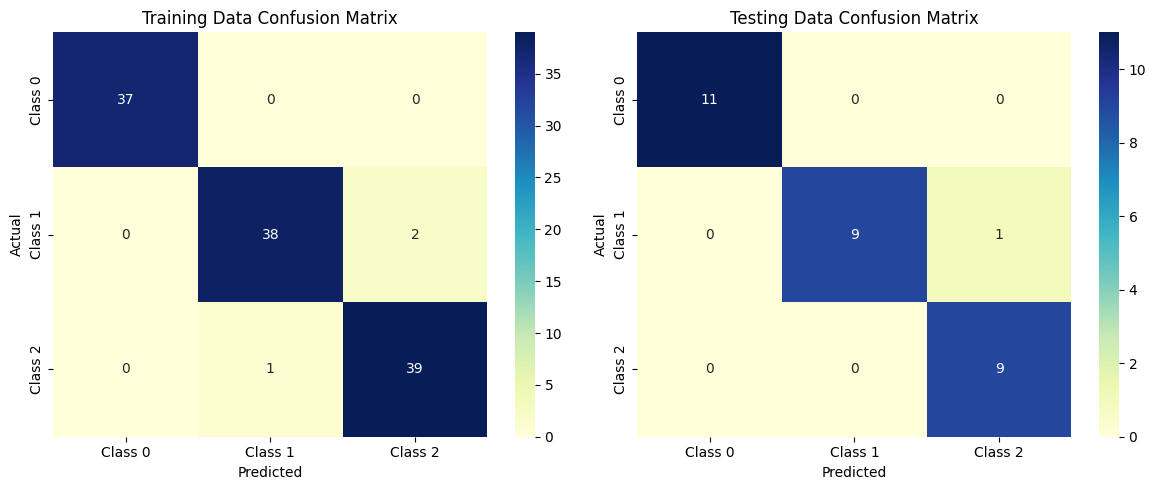


--- Training Classification Report ---
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.974359 | 0.95     |   0.962025 |  40        |
| 2            |    0.95122  | 0.975    |   0.962963 |  40        |
| accuracy     |    0.974359 | 0.974359 |   0.974359 |   0.974359 |
| macro avg    |    0.975193 | 0.975    |   0.974996 | 117        |
| weighted avg |    0.974557 | 0.974359 |   0.974355 | 117        |

--- Testing Classification Report ---
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    1        | 0.9      |   0.947368 | 10        |
| 2            |    0.9      | 1        |   0.947368 |  9        |
| accuracy     |    0.966667 | 0.966667 | 

In [505]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy')
metrics_lr = evaluate_classifier(grid_lr, x_train, x_test, y_train, y_test)
print(f"Logistic Regression Best Parameters: {grid_lr.best_params_}")

2. K-Nearest Neighbour

In [506]:
from sklearn.neighbors import KNeighborsClassifier

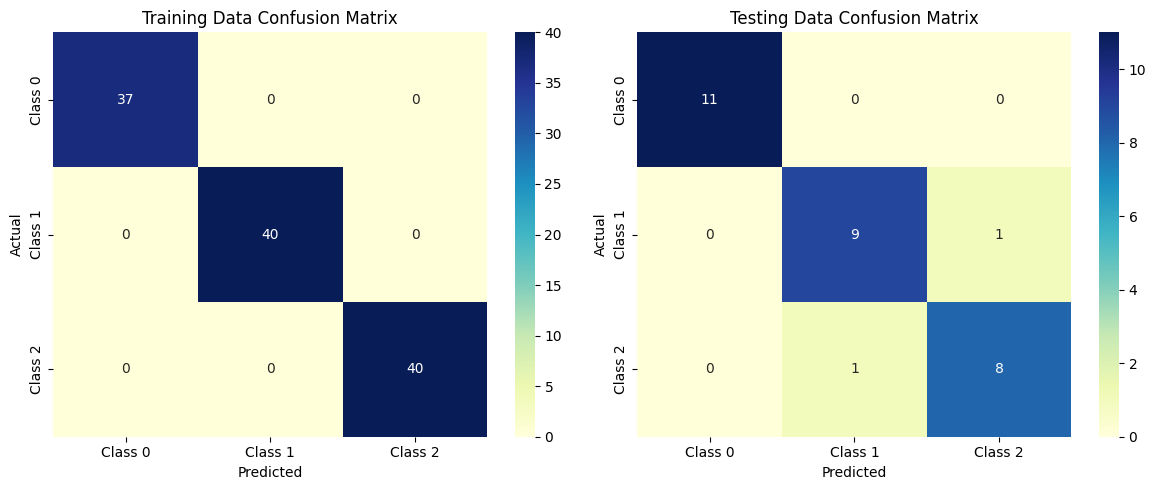


--- Training Classification Report ---
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        37 |
| 1            |           1 |        1 |          1 |        40 |
| 2            |           1 |        1 |          1 |        40 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       117 |
| weighted avg |           1 |        1 |          1 |       117 |

--- Testing Classification Report ---
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.9      | 0.9      |   0.9      | 10        |
| 2            |    0.888889 | 0.888889 |   0.888889 |  9        |
| accuracy     |    0.933333 | 0.933333 |   0.9333

In [507]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': list(range(1,15)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='accuracy')
metrics_knn = evaluate_classifier(grid_knn, x_train, x_test, y_train, y_test)
print(f"KNN Best Parameters: {grid_knn.best_params_}")

3. Decision Tree

In [508]:
from sklearn.tree import DecisionTreeClassifier

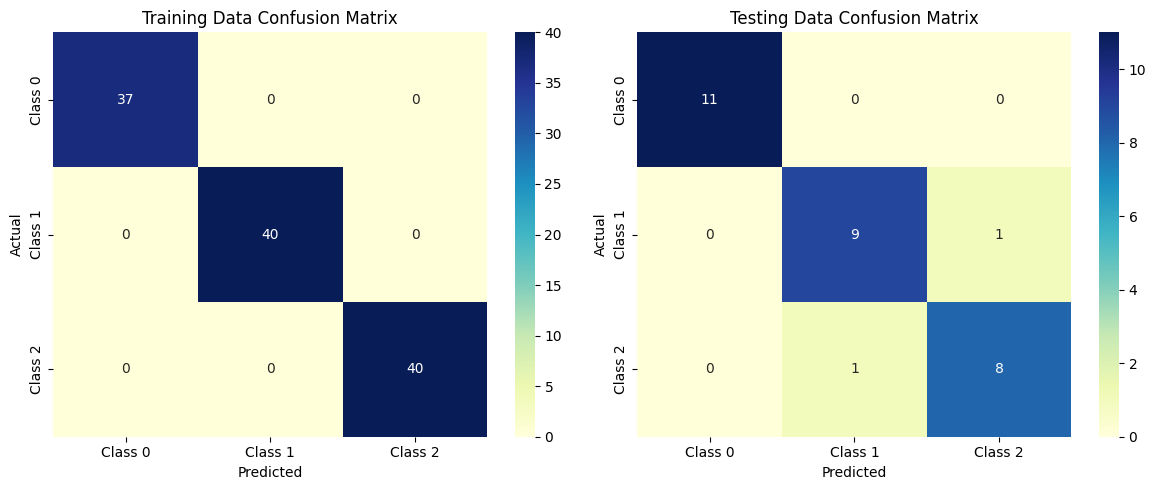


--- Training Classification Report ---
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        37 |
| 1            |           1 |        1 |          1 |        40 |
| 2            |           1 |        1 |          1 |        40 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       117 |
| weighted avg |           1 |        1 |          1 |       117 |

--- Testing Classification Report ---
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.9      | 0.9      |   0.9      | 10        |
| 2            |    0.888889 | 0.888889 |   0.888889 |  9        |
| accuracy     |    0.933333 | 0.933333 |   0.9333

In [509]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
metrics_dt = evaluate_classifier(grid_dt, x_train, x_test, y_train, y_test)
print(f"Decision Tree Best Parameters: {grid_dt.best_params_}")

4. Gaussian Naive Bayes 

In [510]:
from sklearn.naive_bayes import GaussianNB

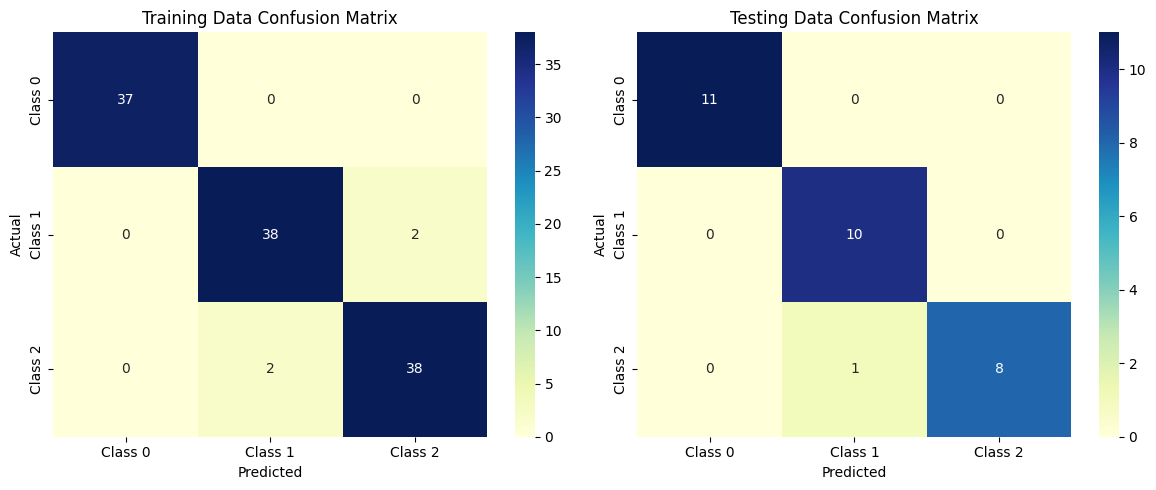


--- Training Classification Report ---
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.95     | 0.95     |   0.95     |  40        |
| 2            |    0.95     | 0.95     |   0.95     |  40        |
| accuracy     |    0.965812 | 0.965812 |   0.965812 |   0.965812 |
| macro avg    |    0.966667 | 0.966667 |   0.966667 | 117        |
| weighted avg |    0.965812 | 0.965812 |   0.965812 | 117        |

--- Testing Classification Report ---
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.909091 | 1        |   0.952381 | 10        |
| 2            |    1        | 0.888889 |   0.941176 |  9        |
| accuracy     |    0.966667 | 0.966667 | 

In [511]:
gnb = GaussianNB()
metrics_gnb = evaluate_classifier(gnb, x_train, x_test, y_train, y_test)

5. Support Vector Machine (SVM) classifier

In [512]:
from sklearn.svm import SVC

In [513]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid_svm = {
    'svm__C': [0.1, 1, 10, 15, 20, 30],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(x_train, y_train)

print(f"Best Parameters: {grid_svm.best_params_}")
print(f"Best Cross-Validation Score: {grid_svm.best_score_:.4f}")

Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Best Cross-Validation Score: 0.9826


Using Neural network (Deep Learning)

In [514]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

Defining our neural network architecture

In [515]:
class IrisClassifier(nn.Module):
    def __init__(self , in_features = 4 , h1 = 32 , h2 = 64 , h3 = 128 , out_feature = 3 ):
        super(IrisClassifier,self).__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3,out_feature)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.out(x)
        return x    

Model instantiation

In [516]:
model = IrisClassifier()

Scaling and conversion to tensors

In [518]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.values) 
x_test = scaler.transform(x_test.values)

x_train = torch.from_numpy(x_train).float()
x_test = torch.from_numpy(x_test).float()
y_train = torch.from_numpy(y_train.values).long().squeeze()
y_test = torch.from_numpy(y_test.values).long().squeeze()


In [519]:
import copy

Defining function of training the model

In [520]:
def train_model(model,optimizer,lr_sched,criterion,epochs,patience):
    best_model = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    patience_cntr = 0
    best_model_wts = copy.deepcopy(model.state_dict())
    
    train_loss,test_losses,test_acc = [],[],[]
    
    for epoch in range(epochs):
        # Training the model
        model.train()
        y_pred = model(x_train)
        loss = criterion(y_pred,y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss.append(loss.item())
        
        # Validating our model
        model.eval()
        with torch.no_grad():
            y_test_pred = model(x_test)
            test_loss = criterion(y_test_pred,y_test)
            test_losses.append(test_loss.item())
            
            y_pred_labels = torch.argmax(y_test_pred,dim=1)
            correct = (y_pred_labels == y_test).sum().item()
            accuracy = correct / len(y_test)
            accuracy = accuracy * 100
            test_acc.append(accuracy)
            
        # --- Learning Rate Step ---
        if lr_sched:
            lr_sched.step(test_loss)    
            
        # Early Stopping checking
        if accuracy > best_acc:
               best_acc = accuracy
               best_model_wts = copy.deepcopy(model.state_dict())
               patience_cntr = 0
        else:
                patience_cntr += 1    
        
        # Print progress
        if (epoch+1) % 5 == 0:
            print(f'Epoch {epoch+1}: Train Loss={loss.item():.4f}, Test Loss={test_loss.item():.4f}, Test Acc={accuracy:.2f}%')        
            
        # Early stopping
        if patience_cntr >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
        
    # Load Best Model
    model.load_state_dict(best_model_wts)
    return model, train_loss, test_losses, test_acc

Hyper-Parameters Grid declaration

In [521]:
optimizers = {
    'Adam' : optim.Adam,
    'SGD' : optim.SGD,
    'RMSprop' : optim.RMSprop,
}

learning_rates = [0.005 , 0.05 , 0.06 , 0.5]

Model evaluation and Plotting of accuracy and loss curves


--- Training with Optimizer: Adam, LR: 0.005 ---
Epoch 5: Train Loss=0.7477, Test Loss=0.6048, Test Acc=83.33%
Epoch 10: Train Loss=0.2967, Test Loss=0.2463, Test Acc=90.00%
Epoch 15: Train Loss=0.1591, Test Loss=0.1592, Test Acc=93.33%
Epoch 20: Train Loss=0.1053, Test Loss=0.1209, Test Acc=93.33%
Epoch 25: Train Loss=0.0895, Test Loss=0.1108, Test Acc=96.67%


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 30: Train Loss=0.1236, Test Loss=0.1050, Test Acc=96.67%
Epoch 35: Train Loss=0.0636, Test Loss=0.0948, Test Acc=96.67%
Epoch 40: Train Loss=0.1301, Test Loss=0.0871, Test Acc=96.67%
Early stopping at epoch 43
Final Accuracy: 96.67%

--- Training with Optimizer: Adam, LR: 0.05 ---
Epoch 5: Train Loss=0.9453, Test Loss=0.5827, Test Acc=66.67%
Epoch 10: Train Loss=0.2060, Test Loss=0.1939, Test Acc=93.33%
Epoch 15: Train Loss=0.0581, Test Loss=0.3358, Test Acc=93.33%
Epoch 20: Train Loss=0.1158, Test Loss=0.0783, Test Acc=96.67%
Epoch 25: Train Loss=0.0795, Test Loss=0.3243, Test Acc=96.67%
Epoch 30: Train Loss=0.0609, Test Loss=0.2427, Test Acc=96.67%
Epoch 35: Train Loss=0.0067, Test Loss=0.2743, Test Acc=96.67%
Epoch 40: Train Loss=0.0219, Test Loss=0.2287, Test Acc=96.67%
Early stopping at epoch 44
Final Accuracy: 96.67%

--- Training with Optimizer: Adam, LR: 0.06 ---
Epoch 5: Train Loss=0.4141, Test Loss=0.2631, Test Acc=83.33%
Epoch 10: Train Loss=0.1741, Test Loss=0.1105, T

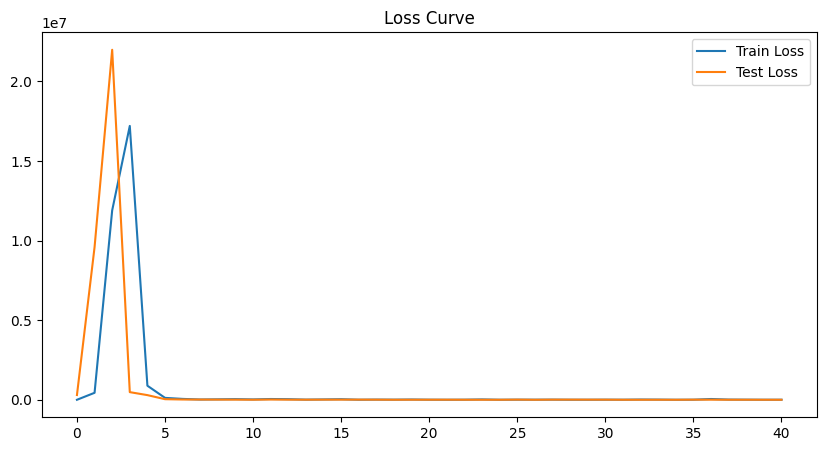

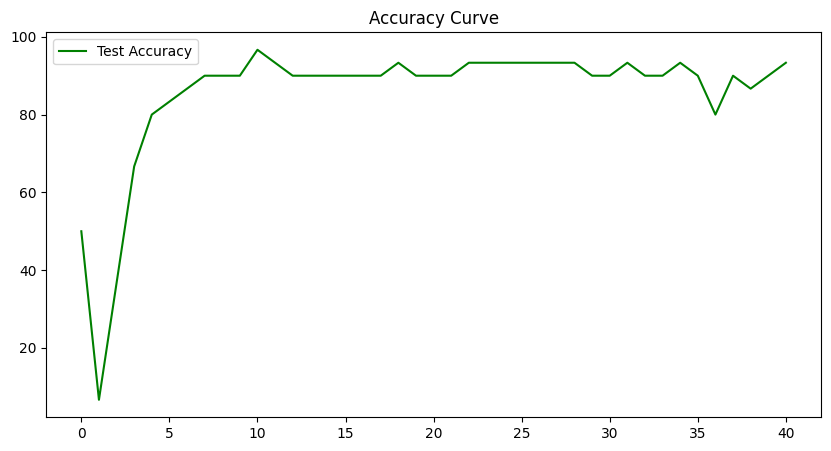

In [522]:
best_model = None
best_accuracy = 0.0
best_param = {}

for opt_name , opt_class in optimizers.items():
    for lr in learning_rates:
        print(f"\n--- Training with Optimizer: {opt_name}, LR: {lr} ---")
        model = IrisClassifier()
        optimizer = opt_class(model.parameters(),lr=lr)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=15 , factor=0.5 , verbose=False)
        criterion = nn.CrossEntropyLoss()
        
        
        trained_model, train_losses, test_losses, test_accuracies = train_model(
            model, optimizer, scheduler, criterion, epochs=200, patience=30
        )
        
        final_acc = test_accuracies[-1]
        print(f"Final Accuracy: {final_acc:.2f}%")

        if final_acc > best_accuracy:
            best_accuracy = final_acc
            best_model = copy.deepcopy(trained_model)
            best_params = {'optimizer': opt_name, 'lr': lr}

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.2f}%")

# Saving the Best Model 
torch.save(best_model.state_dict(), 'best_iris_model.pth')
print("\nBest model saved as 'best_iris_model.pth'")

# Plotting Last Run
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.legend()
plt.title('Accuracy Curve')
plt.show()



In [523]:
model.eval()
with torch.no_grad():
    preds = torch.argmax(model(x_test), dim=1)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Final Conclusions

1. <b>Logistic Regression</b>:
The Logistic Regression model achieved a testing accuracy of approximately 96.66%. It shows consistent and stable performance across all classes, making it a reliable baseline model for the dataset.

2. <b>K-Nearest Neighbors (KNN)</b>:
The KNN model showed clear signs of overfitting. It reached 100% accuracy on the training set, but the testing accuracy dropped to 93.33%. This indicates that while the model memorized the training data, its generalization to unseen data is less effective.

3. <b>Decision Tree Classifier</b>:
Like KNN, the Decision Tree model also displayed overfitting behavior—achieving perfect accuracy on training data but lower testing performance. This is likely because decision trees can become too complex if not pruned, fitting noise in the data.

4. <b>Gaussian Naive Bayes</b>:
Gaussian Naive Bayes performed excellently with a test accuracy of around 96.67%. It maintained a strong balance between training and testing accuracy, indicating good generalization and suitability for the current dataset.

5. <b>SVM (Support Vector Machine)</b>: <b style = "color : red" > The best Model </b>
The SVM classifier gave the best cross-validation score of approximately 98.26% with the optimal hyperparameters:
C = 10, kernel = 'poly', gamma = 'scale'.
This high score suggests that SVM, particularly with a polynomial kernel, captures the decision boundaries very effectively for this dataset and generalizes well.

6. <b>The Neural Network</b> :
The Neural Network achieved a testing accuracy of 96.67%, matching the best-performing models. Using the Adam optimizer (LR = 0.005), dropout layers, early stopping, and learning rate scheduling, it balanced training and testing accuracy well, avoiding overfitting. Its flexibility and scalability make it suitable for further enhancements and larger datasets.